In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')


In [7]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,17.74


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null object
Engine               6019 non-null object
Power                6019 non-null object
Seats                6019 non-null int64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 611.4+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1234 non-null object
Power                1234 non-null object
Seats                1234 non-null int64
New_Price            182 non-null object
dtypes: int64(3), object(9)
memory usage: 115.8+ KB


In [10]:
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,5.277122,9.479468
std,3.269742,9.126884e+04,0.806644,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [11]:
test.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000
mean,2013.400324,58507.288493,5.285251
std,3.179700,35598.702098,0.829109
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [12]:
train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               447
Engine                147
Power                 382
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [13]:
test.nunique()

Name                 768
Location              11
Year                  20
Kilometers_Driven    755
Fuel_Type              4
Transmission           2
Owner_Type             4
Mileage              300
Engine               104
Power                252
Seats                  8
New_Price            162
dtype: int64

In [14]:
train.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [15]:
test.Owner_Type.unique()

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [0]:
def owner_type_enc(type):
  if type=='First':
    return 1
  elif type=='Second':
    return 2
  elif type=='Third':
    return 3
  else:
    return 4
train['Owner_Type']=train['Owner_Type'].apply(owner_type_enc)
test['Owner_Type']=test['Owner_Type'].apply(owner_type_enc)

In [17]:
train.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [18]:
test.Fuel_Type.unique()

array(['CNG', 'Petrol', 'Diesel', 'LPG'], dtype=object)

In [19]:
def transmission_enc(type):
  if type=='Manual':
    return 1
  else:
    return 0
train['Transmission']=train['Transmission'].apply(transmission_enc)
test['Transmission']=test['Transmission'].apply(transmission_enc)
train.head()
  

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,1,1,26.6 km/kg,998 CC,58.16 bhp,5,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,1,1,19.67 kmpl,1582 CC,126.2 bhp,5,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,1,1,18.2 kmpl,1199 CC,88.7 bhp,5,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,1,1,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,0,2,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,17.74


In [20]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,1,1,32.26 km/kg,998 CC,58.2 bhp,4,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,1,2,24.7 kmpl,796 CC,47.3 bhp,5,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,1,1,13.68 kmpl,2393 CC,147.8 bhp,7,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,1,1,23.59 kmpl,1364 CC,67.04 bhp,5,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,1,1,18.5 kmpl,1197 CC,82.85 bhp,5,NaN


In [21]:
train.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [22]:
test.Location.unique()

array(['Delhi', 'Coimbatore', 'Mumbai', 'Hyderabad', 'Pune', 'Jaipur',
       'Chennai', 'Kochi', 'Bangalore', 'Kolkata', 'Ahmedabad'],
      dtype=object)

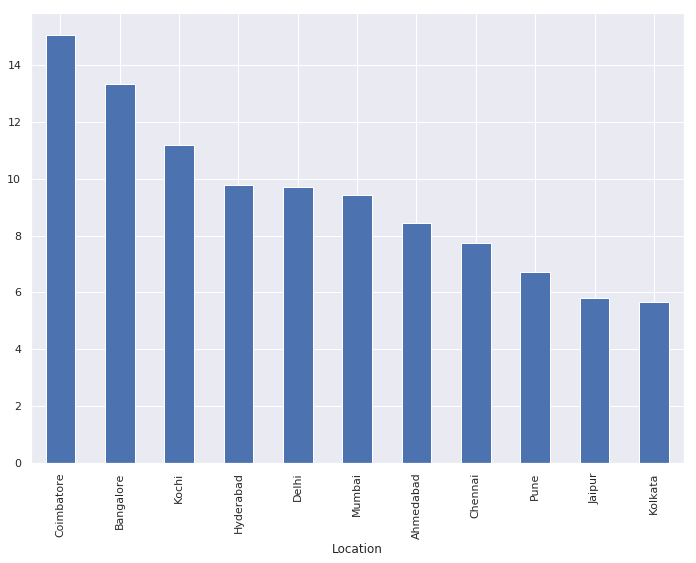

In [23]:
train.groupby("Location").Price.mean().sort_values(ascending=False).plot.bar()

In [0]:
location_rank = { 'Mumbai':6, 'Pune':9, 'Chennai':8, 'Coimbatore':1, 'Hyderabad':4, 'Jaipur':10,
       'Kochi':3, 'Kolkata':11, 'Delhi':5, 'Bangalore':2, 'Ahmedabad':7
    
}

In [25]:
def location_enc(loc):
  if loc in location_rank:
     return location_rank[loc]
train['Location']=train['Location'].apply(location_enc)
test['Location']=test['Location'].apply(location_enc)

test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,5,2014,40929,CNG,1,1,32.26 km/kg,998 CC,58.2 bhp,4,NaN
1,Maruti Alto 800 2016-2019 LXI,1,2013,54493,Petrol,1,2,24.7 kmpl,796 CC,47.3 bhp,5,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,6,2017,34000,Diesel,1,1,13.68 kmpl,2393 CC,147.8 bhp,7,25.27 Lakh
3,Toyota Etios Liva GD,4,2012,139000,Diesel,1,1,23.59 kmpl,1364 CC,67.04 bhp,5,NaN
4,Hyundai i20 Magna,6,2014,29000,Petrol,1,1,18.5 kmpl,1197 CC,82.85 bhp,5,NaN


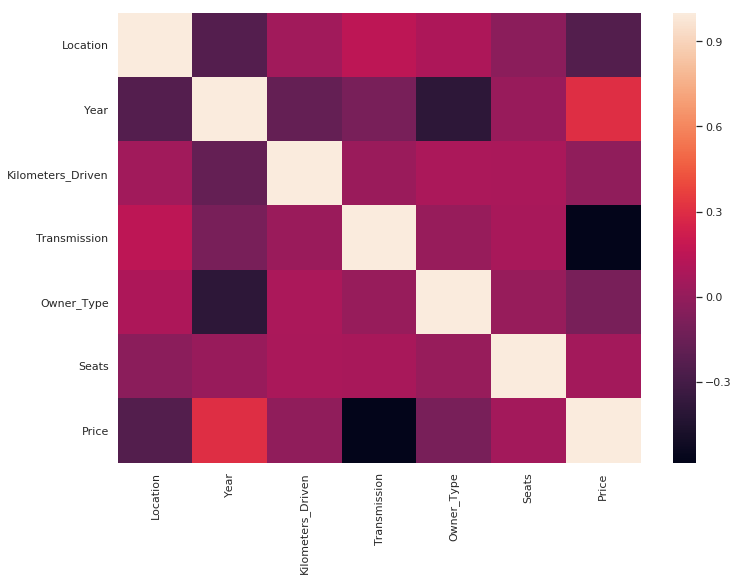

In [26]:
sns.heatmap(train.corr())

In [27]:
def Brand_ext(Name):
  if "Land" not in Name.split(maxsplit=1)[0]:
    return Name.split(maxsplit=1)[0]
  else:
    if 'Range' not in Name.split(maxsplit=4):
      return 'Land Rover'
    else:
      return 'Range Rover'
train['Brand']=train['Name'].apply(Brand_ext)
test['Brand']=test['Name'].apply(Brand_ext)
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Maruti Wagon R LXI CNG,6,2010,72000,CNG,1,1,26.6 km/kg,998 CC,58.16 bhp,5,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,9,2015,41000,Diesel,1,1,19.67 kmpl,1582 CC,126.2 bhp,5,NaN,12.50,Hyundai
2,Honda Jazz V,8,2011,46000,Petrol,1,1,18.2 kmpl,1199 CC,88.7 bhp,5,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,8,2012,87000,Diesel,1,1,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,1,2013,40670,Diesel,0,2,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,17.74,Audi


In [28]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Maruti Alto K10 LXI CNG,5,2014,40929,CNG,1,1,32.26 km/kg,998 CC,58.2 bhp,4,NaN,Maruti
1,Maruti Alto 800 2016-2019 LXI,1,2013,54493,Petrol,1,2,24.7 kmpl,796 CC,47.3 bhp,5,NaN,Maruti
2,Toyota Innova Crysta Touring Sport 2.4 MT,6,2017,34000,Diesel,1,1,13.68 kmpl,2393 CC,147.8 bhp,7,25.27 Lakh,Toyota
3,Toyota Etios Liva GD,4,2012,139000,Diesel,1,1,23.59 kmpl,1364 CC,67.04 bhp,5,NaN,Toyota
4,Hyundai i20 Magna,6,2014,29000,Petrol,1,1,18.5 kmpl,1197 CC,82.85 bhp,5,NaN,Hyundai


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Name                 6019 non-null object
Location             6019 non-null int64
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null int64
Owner_Type           6019 non-null int64
Mileage              6019 non-null object
Engine               6019 non-null object
Power                6019 non-null object
Seats                6019 non-null int64
New_Price            824 non-null object
Price                6019 non-null float64
Brand                6019 non-null object
dtypes: float64(1), int64(6), object(7)
memory usage: 658.4+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
Name                 1234 non-null object
Location             1234 non-null int64
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null int64
Owner_Type           1234 non-null int64
Mileage              1234 non-null object
Engine               1234 non-null object
Power                1234 non-null object
Seats                1234 non-null int64
New_Price            182 non-null object
Brand                1234 non-null object
dtypes: int64(6), object(7)
memory usage: 125.4+ KB


In [31]:
len(train.Brand.unique()) #31
train.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Range Rover', 'Land Rover', 'Mitsubishi',
       'Renault', 'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche',
       'Datsun', 'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat',
       'Jeep', 'Smart', 'Hindustan', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [32]:
test.Brand.unique()

array(['Maruti', 'Toyota', 'Hyundai', 'Mahindra', 'Honda', 'Audi',
       'Nissan', 'BMW', 'Ford', 'Skoda', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz', 'Tata', 'Chevrolet', 'Datsun', 'Jaguar', 'Fiat',
       'Hindustan', 'Renault', 'Mini', 'Bentley', 'Land Rover', 'Volvo',
       'Range Rover', 'ISUZU', 'Jeep', 'Porsche', 'Opel'], dtype=object)

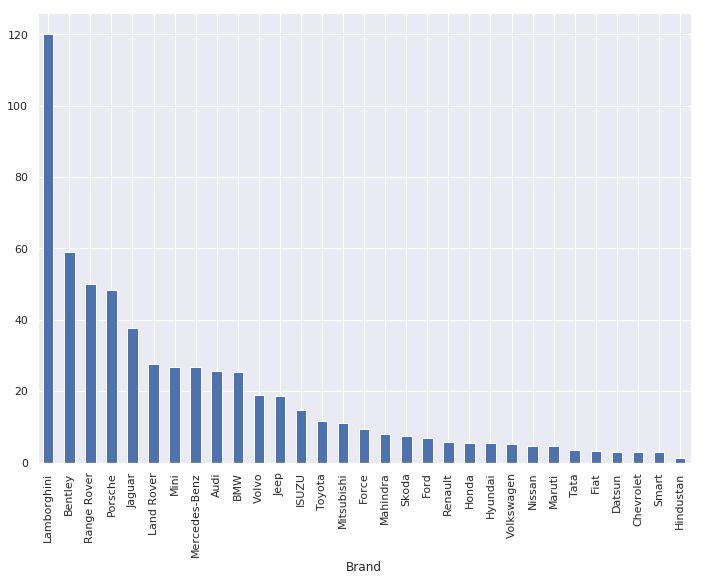

In [33]:
train.groupby("Brand").Price.mean().sort_values(ascending=False).plot.bar()

In [34]:
train.groupby("Brand").Price.mean().sort_values(ascending=False)

Brand
Lamborghini      120.000000
Bentley           59.000000
Range Rover       50.122258
Porsche           48.348333
Jaguar            37.632250
Land Rover        27.647586
Mini              26.896923
Mercedes-Benz     26.809874
Audi              25.537712
BMW               25.243146
Volvo             18.802857
Jeep              18.718667
ISUZU             14.696667
Toyota            11.580024
Mitsubishi        11.058889
Force              9.333333
Mahindra           8.045919
Skoda              7.559075
Ford               6.889400
Renault            5.799034
Honda              5.411743
Hyundai            5.343433
Volkswagen         5.307270
Nissan             4.738352
Maruti             4.517267
Tata               3.562849
Fiat               3.269286
Datsun             3.049231
Chevrolet          3.044463
Smart              3.000000
Hindustan          1.350000
Name: Price, dtype: float64

In [0]:
brand_rank={
    'Maruti':25, 'Hyundai':22, 'Honda':21, 'Audi':9, 'Nissan':24, 'Toyota':14,
       'Volkswagen':23, 'Tata':26, 'Range Rover':3, 'Land Rover':6, 'Mitsubishi':15,
       'Renault':20, 'Mercedes-Benz':8, 'BMW':10, 'Mahindra':17, 'Ford':19, 'Porsche':4,
       'Datsun':28, 'Jaguar':5, 'Volvo':11, 'Chevrolet':29, 'Skoda':18, 'Mini':7, 'Fiat':27,
       'Jeep':12, 'Smart':30, 'Ambassador':31, 'ISUZU':13, 'Force':16, 'Bentley':2,
       'Lamborghini':1
}


In [36]:
def brand_enc(brand):
  if brand in brand_rank:
     return brand_rank[brand]
  else:
     return 21
train['Brand']=train['Brand'].apply(brand_enc)
test['Brand']=test['Brand'].apply(brand_enc)

test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Maruti Alto K10 LXI CNG,5,2014,40929,CNG,1,1,32.26 km/kg,998 CC,58.2 bhp,4,NaN,25
1,Maruti Alto 800 2016-2019 LXI,1,2013,54493,Petrol,1,2,24.7 kmpl,796 CC,47.3 bhp,5,NaN,25
2,Toyota Innova Crysta Touring Sport 2.4 MT,6,2017,34000,Diesel,1,1,13.68 kmpl,2393 CC,147.8 bhp,7,25.27 Lakh,14
3,Toyota Etios Liva GD,4,2012,139000,Diesel,1,1,23.59 kmpl,1364 CC,67.04 bhp,5,NaN,14
4,Hyundai i20 Magna,6,2014,29000,Petrol,1,1,18.5 kmpl,1197 CC,82.85 bhp,5,NaN,22


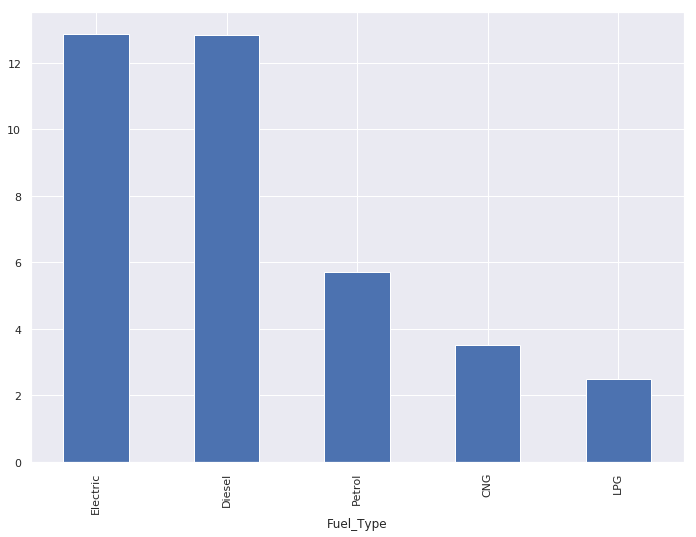

In [37]:
 '''fuel type heirachy found on the net:
Electric
Diesel
CNG
LPG
Petrol'''
train.loc[train.Fuel_Type.str.contains("Electric")]#['Price'].values
train.groupby("Fuel_Type").Price.mean().sort_values(ascending=False).plot.bar()

In [38]:
def fuel_type_enc(fuel):
  if fuel == 'Electric':
    return 1
  elif fuel =='Diesel':
    return 2
  elif fuel == 'CNG':
    return 4
  elif fuel == ' LPG':
    return 5
  else:
    return 3
train['Fuel_Type']=train['Fuel_Type'].apply(fuel_type_enc)
test['Fuel_Type']=test['Fuel_Type'].apply(fuel_type_enc)
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Maruti Alto K10 LXI CNG,5,2014,40929,4,1,1,32.26 km/kg,998 CC,58.2 bhp,4,NaN,25
1,Maruti Alto 800 2016-2019 LXI,1,2013,54493,3,1,2,24.7 kmpl,796 CC,47.3 bhp,5,NaN,25
2,Toyota Innova Crysta Touring Sport 2.4 MT,6,2017,34000,2,1,1,13.68 kmpl,2393 CC,147.8 bhp,7,25.27 Lakh,14
3,Toyota Etios Liva GD,4,2012,139000,2,1,1,23.59 kmpl,1364 CC,67.04 bhp,5,NaN,14
4,Hyundai i20 Magna,6,2014,29000,3,1,1,18.5 kmpl,1197 CC,82.85 bhp,5,NaN,22


In [39]:
#dealing with null values for engine power and seats
train.loc[train['Mileage'].isnull()]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand


In [40]:
len(train.loc[train['Mileage']=='0.0 kmpl']) #57
train.loc[train['Mileage']=='0.0 kmpl'].Name.unique()
test.loc[test['Mileage']=='0.0 kmpl'].Name.unique()

array([], dtype=object)

In [41]:
#train.loc[train['Seats'].isnull()]
test.loc[test['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand


In [42]:
def engine_to_float(engine_str):
    return float(engine_str.replace("CC",""))

train['Engine']=train['Engine'].apply(engine_to_float)
test['Engine']=test['Engine'].apply(engine_to_float)
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Maruti Wagon R LXI CNG,6,2010,72000,4,1,1,26.6 km/kg,998.0,58.16 bhp,5,NaN,1.75,25
1,Hyundai Creta 1.6 CRDi SX Option,9,2015,41000,2,1,1,19.67 kmpl,1582.0,126.2 bhp,5,NaN,12.50,22
2,Honda Jazz V,8,2011,46000,3,1,1,18.2 kmpl,1199.0,88.7 bhp,5,8.61 Lakh,4.50,21
3,Maruti Ertiga VDI,8,2012,87000,2,1,1,20.77 kmpl,1248.0,88.76 bhp,7,NaN,6.00,25
4,Audi A4 New 2.0 TDI Multitronic,1,2013,40670,2,0,2,15.2 kmpl,1968.0,140.8 bhp,5,NaN,17.74,9


In [43]:
len(train.loc[train['Power'].str.contains("null")]['Name'].unique())
train.loc[train['Power'].str.contains("null")]['Name'].unique()
test.loc[test['Power'].str.contains("null")]['Name'].unique()

array([], dtype=object)

In [44]:
#dropping new price due to too many null values
train.drop('New_Price',axis=1,inplace=True)
test.drop('New_Price',axis=1,inplace=True)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null int64
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null int64
Transmission         6019 non-null int64
Owner_Type           6019 non-null int64
Mileage              6019 non-null object
Engine               6019 non-null float64
Power                6019 non-null object
Seats                6019 non-null int64
Price                6019 non-null float64
Brand                6019 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 611.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Name                 1234 non-null object
Location             1234 non-null int64
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type        

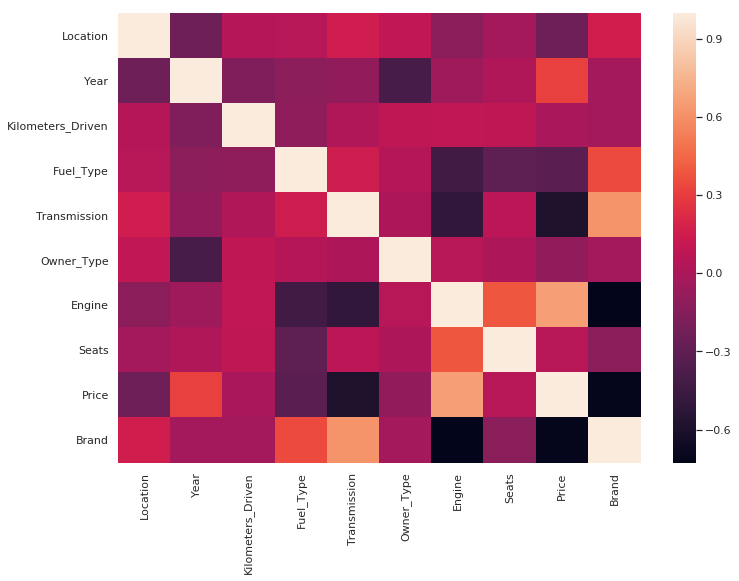

In [45]:
sns.heatmap(train.corr())

In [0]:
def mileage_conv(car):
  if car['Mileage'].split(maxsplit=1)[1] == 'km/kg':
    if car['Fuel_Type']==3: #CNG
      return float(car['Mileage'].split(maxsplit=1)[0])*0.621*2.567
    else:                #LPG
      return float(car['Mileage'].split(maxsplit=1)[0])*0.621*(1/(0.264*1.96))*1.247
  if car.Mileage.split(maxsplit=1)[1] == 'kmpl':
    if car['Fuel_Type']==2: #Diesel
      return float(car['Mileage'].split(maxsplit=1)[0])*0.621*(1/0.264)*0.88
    else:                #Petrol
      return float(car['Mileage'].split(maxsplit=1)[0])*0.621*(1/0.264)
  else:     #Electric
    return float(car['Mileage'].split(maxsplit=1)[0])
  
train['Mileage']=train.apply(mileage_conv,axis=1)
test['Mileage']=test.apply(mileage_conv,axis=1)
  

In [47]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,6,2010,72000,4,1,1,39.808856,998.0,58.16 bhp,5,1.75,25
1,Hyundai Creta 1.6 CRDi SX Option,9,2015,41000,2,1,1,40.716900,1582.0,126.2 bhp,5,12.50,22
2,Honda Jazz V,8,2011,46000,3,1,1,42.811364,1199.0,88.7 bhp,5,4.50,21
3,Maruti Ertiga VDI,8,2012,87000,2,1,1,42.993900,1248.0,88.76 bhp,7,6.00,25
4,Audi A4 New 2.0 TDI Multitronic,1,2013,40670,2,0,2,31.464000,1968.0,140.8 bhp,5,17.74,9


In [48]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Maruti Alto K10 LXI CNG,5,2014,40929,4,1,1,48.279462,998.0,58.2 bhp,4,25
1,Maruti Alto 800 2016-2019 LXI,1,2013,54493,3,1,2,58.101136,796.0,47.3 bhp,5,25
2,Toyota Innova Crysta Touring Sport 2.4 MT,6,2017,34000,2,1,1,28.317600,2393.0,147.8 bhp,7,14
3,Toyota Etios Liva GD,4,2012,139000,2,1,1,48.831300,1364.0,67.04 bhp,5,14
4,Hyundai i20 Magna,6,2014,29000,3,1,1,43.517045,1197.0,82.85 bhp,5,22


In [49]:
def power_to_float(power_str):
    return float(power_str.replace("bhp",""))

train['Power']=train['Power'].apply(power_to_float)
test['Power']=test['Power'].apply(power_to_float)

test.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Maruti Alto K10 LXI CNG,5,2014,40929,4,1,1,48.279462,998.0,58.20,4,25
1,Maruti Alto 800 2016-2019 LXI,1,2013,54493,3,1,2,58.101136,796.0,47.30,5,25
2,Toyota Innova Crysta Touring Sport 2.4 MT,6,2017,34000,2,1,1,28.317600,2393.0,147.80,7,14
3,Toyota Etios Liva GD,4,2012,139000,2,1,1,48.831300,1364.0,67.04,5,14
4,Hyundai i20 Magna,6,2014,29000,3,1,1,43.517045,1197.0,82.85,5,22


In [0]:
#dropping name
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [0]:
train.to_csv('num_train.csv', index=False)
test.to_csv('num_test.csv', index=False)

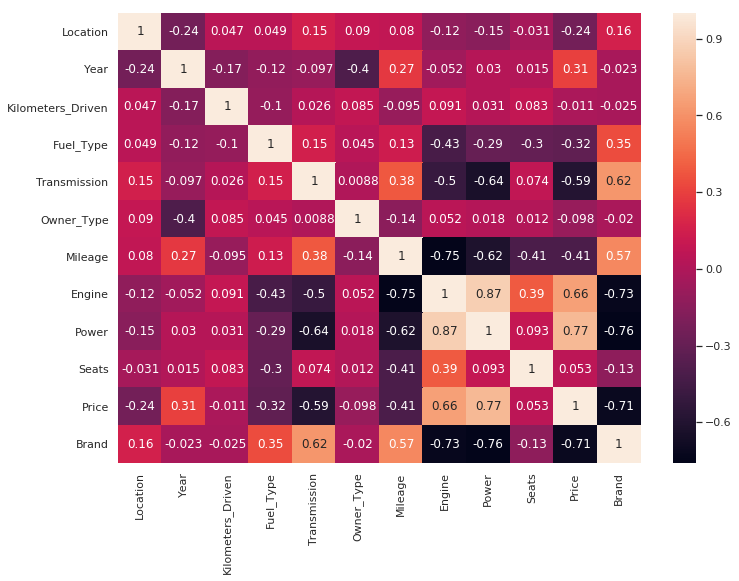

In [53]:
sns.heatmap(train.corr(),annot=True)